In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
merged_df = pd.merge(city_df,ride_df,how='left',on='city')
test_df = pd.merge(city_df,ride_df,how='left',on='city')

In [3]:
merged_df = merged_df.set_index('city')
merged_df.head()

,driver_count,type,date,fare,ride_id
city,,,,,
Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


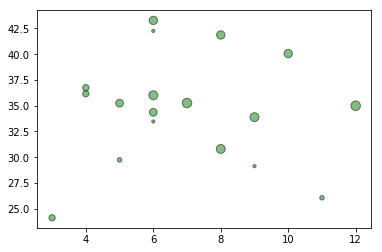

In [4]:
rural_df = merged_df[merged_df['type']=='Rural']

rfare_avg = rural_df.groupby('city').mean()['fare']
rride_count= rural_df.groupby('city').count()['date']
rdriver_count = rural_df.loc[:,['driver_count']].drop_duplicates()



rural_scatter = plt.scatter(rride_count,rfare_avg, s = rdriver_count*10, alpha = .5,
                            edgecolor = 'black',label = 'Rural',color = 'green')

plt.show()

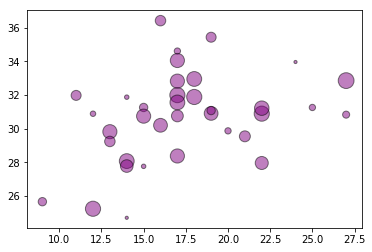

In [5]:
suburb_df = merged_df[merged_df['type']=='Suburban']

sfare_avg = suburb_df.groupby('city').mean()['fare']
sride_count= suburb_df.groupby('city').count()['date']
sdriver_count = suburb_df.groupby('city').mean()['driver_count']

suburb_scatter = plt.scatter(sride_count,sfare_avg, s = sdriver_count*10, alpha = .5,
                            edgecolor = 'black',label = 'Suburbs',color = 'purple')
plt.show()

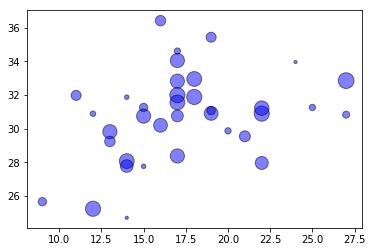

In [6]:
urban_df = merged_df[merged_df['type']=='Urban']

ufare_avg = suburb_df.groupby('city').mean()['fare']
uride_count= suburb_df.groupby('city').count()['date']
udriver_count = suburb_df.groupby('city').mean()['driver_count']


suburb_scatter = plt.scatter(uride_count,ufare_avg, s = udriver_count*10, alpha = .5,
                            edgecolor = 'black',label = 'Urban',color = 'blue')
plt.show()

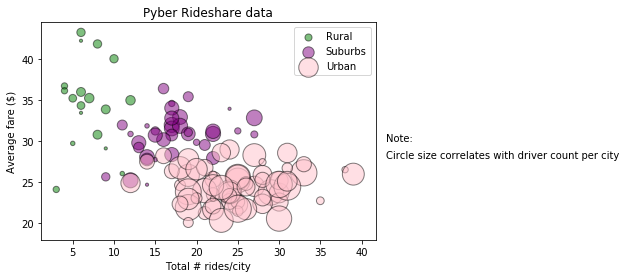

In [13]:
#rural
rural_df = merged_df[merged_df['type']=='Rural']

rfare_avg = rural_df.groupby('city').mean()['fare']
rride_count= rural_df.groupby('city').count()['date']
rdriver_count = rural_df.loc[:,['driver_count']].drop_duplicates()

rural_scatter = plt.scatter(rride_count,rfare_avg, s = rdriver_count*10, alpha = .5,
                            edgecolor = 'black',label = 'Rural',color = 'green')

#suburbs
suburb_df = merged_df[merged_df['type']=='Suburban']

sfare_avg = suburb_df.groupby('city').mean()['fare']
sride_count= suburb_df.groupby('city').count()['date']
sdriver_count = suburb_df.groupby('city').mean()['driver_count']

suburb_scatter = plt.scatter(sride_count,sfare_avg, s = sdriver_count*10, alpha = .5,
                            edgecolor = 'black',label = 'Suburbs',color = 'purple')

#urbs
urban_df = merged_df[merged_df['type']=='Urban']

ufare_avg = urban_df.groupby('city').mean()['fare']
uride_count= urban_df.groupby('city').count()['date']
udriver_count = urban_df.groupby('city').mean()['driver_count']

suburb_scatter = plt.scatter(uride_count,ufare_avg, s = udriver_count*10, alpha = .5,
                            edgecolor = 'black',label = 'Urban',color = 'pink')

plt.title('Pyber Rideshare data')
plt.xlabel('Total # rides/city')
plt.ylabel('Average fare ($)')
plt.legend(loc = 'best')
plt.text(43, 30, 'Note:')
plt.text(43, 28, 'Circle size correlates with driver count per city')
plt.savefig('pyber_scatter.png')
plt.show()

## Bubble Plot of Ride Sharing Data

In [8]:
# Obtain the x and y coordinates for each of the three city types
city_type_group = merged_df.groupby(['type','city'])
city_type_group=city_type_group.count()
city_type_group.head()

driver_count  date  fare  ride_id
type  city                                             
Rural Bradshawfurt              10    10    10       10
      Garzaport                  3     3     3        3
      Harringtonfort             6     6     6        6
      Jessicaport                6     6     6        6
      Lake Jamie                 6     6     6        6

# Total Fares by City Type

In [14]:
# Calculate Type Percents
merged_df.head()

#creating new df
fare_df = merged_df[['type','fare']]
fare_group = fare_df.groupby('type')
#calculating fare sum
sizes = fare_group.sum()


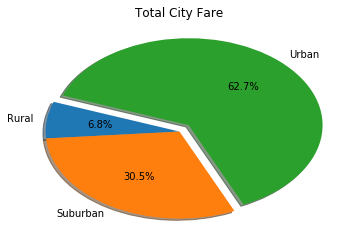

In [15]:
# Build Pie Chart
#creating labels & grabbing the unique type names
label = merged_df.loc[:,['type']].drop_duplicates(subset = 'type',keep = 'first')
#sorting the labels b/c one df = ('rural, suburb, urb') the other = ('urban, suburban, rural')
label = label.sort_values(by = 'type')

#grabbing the values in the sizes df in the fare column
s = [x for x in sizes['fare']]

explode = [0,0,0.1]

city_fare = plt.pie(s,labels = label['type'], autopct ='%1.1f%%',shadow = True,startangle = 160, explode=explode)

plt.title('Total City Fare')

# Save Figure
plt.savefig('cityfares.png')
# Show Figure
plt.show()

# Total Rides by City Type

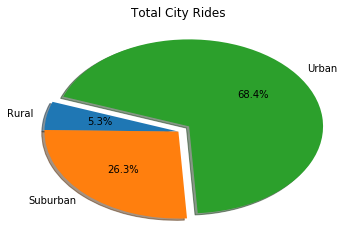

In [16]:
# Calculate Ride Percents
num_rides_df = merged_df[['type','ride_id']]
num_rides_group = num_rides_df.groupby('type')
rides = num_rides_group.count()

#create labels
label = merged_df.loc[:,['type']].drop_duplicates(subset = 'type',keep = 'first')
#sorting the labels b/c one df = ('rural, suburb, urb') the other = ('urban, suburban, rural')
label = label.sort_values(by = 'type')

#grabbing the values from the rides variable
r=[x for x in rides['ride_id']]
explode = [0,0,0.1]
total_rides = plt.pie(r,labels = label['type'], autopct ='%1.1f%%',shadow = True,explode = explode, startangle = 160)

plt.title('Total City Rides')

# Save Figure
plt.savefig('totalrides.png')
# Show Figure
plt.show()



## Total Drivers by City Type

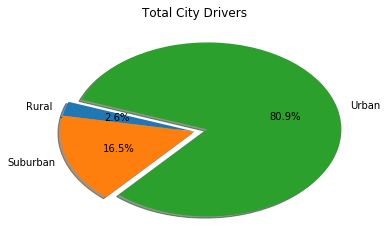

In [17]:
# Calculate Driver Percents
one_city = test_df.loc[:,['city','driver_count','type']].drop_duplicates(keep = 'first')
one_city_group = one_city.groupby('type')
one_city_driver_count = one_city_group.sum()
one_city_driver_count

#labels
label = merged_df.loc[:,['type']].drop_duplicates(keep = 'first')
label = label['type'].sort_values(ascending= True)

explode =[0,0,0.1]

d = [x for x in one_city_driver_count['driver_count']]
# Build Pie Charts
total_driver = plt.pie(d,labels = label, autopct ='%1.1f%%',shadow = True,explode = explode, startangle = 160)

plt.title('Total City Drivers')

# Save Figure
plt.savefig('totaldrivers.png')
# Show Figure
plt.show()

# You must include a written description of three observable trends based on the data.
## 1) Rural pyber drivers charge more than urban drivers. In addition there are significantly less rural drivers than urban drivers.
## 2) Urban pyber drivers make up ~81% of the total drivers
## 3) Rural ride frequency(#rides/city) is less then urban ride frequency 